
# Web Scraping from Indeed.com and Predicting Salaries

### Business Case Overview

<b>Point of View</b>: You're working as a data scientist for a contracting firm that's rapidly expanding. The firm need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your manager wants you to determine the industry factors that are most important in predicting the salary amounts for data scientists/research scietists.


Aggregators like [Indeed.com](https://www.indeed.com) regularly pool job postings from a variety of markets and industries.




### Factors that impact salary

Here we just want to estimate which factors (like location, job title/job level) lead to high or low salary and work with a classification model. To do so, I will split the salary into two groups of high and low salary, for example by choosing the median salary as a threshold (in principle I could choose any single or multiple splitting points).

I will use all the skills I have learned so far on the General Assembley Data Science Immersive to build a predictive model.


<b> Import Packages </b>

In [6]:
import requests
import bs4
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Scraping job listings from Indeed.com

We will be scraping job listings from Indeed.com using BeautifulSoup. Luckily, Indeed.com is a simple text page where we can easily find relevant entries.

First, look at the source of an Indeed.com page: (http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10").


#### Setup a request (using `requests`) to the URL below. Use BeautifulSoup to parse the page and extract all results 

The URL here has many query parameters:

- `q` for the job search
- `l` for a location 
- `start` for what result number to start on

In [ ]:
URL = "https://uk.indeed.com/jobs?q=data+scientist&l=London"

In [ ]:
#attempted to change my vpn to avoid the captcha page
import requests
import random
user_agent_list = [
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.1.1 Safari/605.1.15',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:77.0) Gecko/20100101 Firefox/77.0',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:77.0) Gecko/20100101 Firefox/77.0',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36',
]
url = 'https://uk.indeed.com/jobs?q=data+scientist&l=Cambridge'


In [ ]:
for i in range(1,2):
    #Pick a random user agent
    user_agent = random.choice(user_agent_list)
    #Set the headers 
    headers = {'User-Agent': user_agent}
    #Make the request
    response = requests.get(url,headers=headers)
    web = requests.get(URL)
    soup = BeautifulSoup(web.text, 'html.parser')
    print(soup)

Read in the html with Beautiful Soup

In [ ]:
soup = BeautifulSoup(html,'html.parser')
soup

A single `result` looks like

```
<div class=" row result" data-jk="2480d203f7e97210" data-tn-component="organicJob" id="p_2480d203f7e97210" itemscope="" itemtype="http://schema.org/JobPosting">
<h2 class="jobtitle" id="jl_2480d203f7e97210">
<a class="turnstileLink" data-tn-element="jobTitle" onmousedown="return rclk(this,jobmap[0],1);" rel="nofollow" target="_blank" title="AVP/Quantitative Analyst">AVP/Quantitative Analyst</a>
</h2>
<span class="company" itemprop="hiringOrganization" itemtype="http://schema.org/Organization">
<span itemprop="name">
<a href="/cmp/Alliancebernstein?from=SERP&amp;campaignid=serp-linkcompanyname&amp;fromjk=2480d203f7e97210&amp;jcid=b374f2a780e04789" target="_blank">
    AllianceBernstein</a></span>
</span>
<tr>
<td class="snip">
<nobr>$117,500 - $127,500 a year</nobr>
<div>
<span class="summary" itemprop="description">
C onduct quantitative and statistical research as well as portfolio management for various investment portfolios. Collaborate with Quantitative Analysts and</span>
</div>
</div>
</td>
</tr>
</table>
</div>
```

While this has some more verbose elements removed, we can see that there is some structure to the above:
- The salary is in a `span` with `class='salaryText'`.
- The title of a job is in a link with class set to `jobtitle` and a `data-tn-element='jobTitle'`.  
- The location is set in a `span` with `class='location'`. 
- The company is set in a `span` with `class='company'`.

### Writing a function to extract each item: location, company, job, and salary.

In [ ]:
# #only get a job postings info if there is a salary to extract
# results = []
# for job in soup.find_all('div', class_ = 'jobsearch-SerpJobCard'):
#     for x in job.find_all('span', class_ = 'salaryText'):
#         if x.text != None:
#             salary = job.find('span', class_ = 'salaryText').text
#             company = job.find('span', class_ = 'company').text
            
#             if job.find('span', class_ = 'location') == None:
#                 location = np.nan
                            
#             else:
#                 location = job.find('span', class_ = 'location').text
                
#             summary = job.find('div', class_ = 'summary').text
#             results.append([salary,company,location,summary])
            
            
            


In [ ]:
#THE ACTUAL FUNCTION USED TO SCRAPE

def total_extraction(soup):
    for job in soup.find_all('div', class_ = 'jobsearch-SerpJobCard'):
        for x in job.find_all('span', class_ = 'salaryText'):
            if x.text != None:
                salary = job.find('span', class_ = 'salaryText').text
                company = job.find('span', class_ = 'company').text
            
                if job.find('span', class_ = 'location') == None:
                    location = np.nan
                            
                else:
                    location = job.find('span', class_ = 'location').text
                    
                summary = job.find('div', class_ = 'summary').text
                title = job.find('a', class_ = 'jobtitle').text
                # taking the city searched for as well as the location as many locations are blank on the website
                #this may cause multicolinearity but that can be minimised using regularisation (espacially lasso)
                results.append([title, salary,company,location,summary,city])
                print('Extraction occuring')

In [ ]:
#TESTING THE FUNCTION
results = []
total_extraction(soup)
results

In [ ]:
url = 'https://www.linkedin.com/jobs/search/?keywords=data%20science&location=London'
link = requests.get(url)
linkedin = BeautifulSoup(link.text,'html.parser')

Now, to scale up our scraping, we need to accumulate more results. We can do this by examining the URL above.

- "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

There are two query parameters here we can alter to collect more results, the `l=New+York` and the `start=10`. The first controls the location of the results (so we can try a different city). The second controls where in the results to start and gives 10 results (thus, we can keep incrementing by 10 to go further in the list).

### The following code to collects results from multiple cities and starting points. 


In [ ]:
results
from tqdm import tqdm

In [ ]:
from tqdm import tqdm
import time
url_template = "https://uk.indeed.com/jobs?q=data+scientist&l={}&start={}"

#one can adapt this to change the max number of pages per city
max_results_per_city = 500

results = []

for city in tqdm(['London','Birmingham','Glasgow','Edinburgh','Liverpool','Manchester','Bristol','Cardiff',
                  'Newcastle+upon+Tyne','Brighton','Swansea','Southampton','Cambridge']):
    
    for job in set(['data+scientist', 'data+analyst', 'business+intelligence', 'research+scientist']):
        
        for start in range(0, max_results_per_city, 10):
        # Grab the results using the request function
            web = requests.get(f"https://uk.indeed.com/jobs?q={job}&l={city}&start={start}")
            indeed = BeautifulSoup(web.text, 'html.parser')
            # Append to the full set of results
            total_extraction(indeed)
            
            #need to be able to see if the function isnt working properly
            if soup.find('title').text == 'hCaptcha solve page':
                print((soup.find('title').text,(city,job,start)))
                time.sleep(6)
                break
                
            time.sleep(6)
            print((city,job,start))
            print('\n\n\n')
            
            pass
    
   
     


In [ ]:
results

In [ ]:
len(results)

Below are some snippets of code that had to be used to put some of the infomation together when the captcha page was encountered 

In [ ]:
len(bristol_london)

In [ ]:
bristol_london = results.copy()


In [ ]:
manchester_to_southhampton = results.copy()
len(manchester_to_southhampton)

In [ ]:
bristol_south = bristol_london + manchester_to_southhampton


In [ ]:
#need the new results up to cambridge BI

london_to_cambridge_dataanalyst_300 = results.copy()

In [ ]:
london_to_twells_300 = london_to_cambridge_dataanalyst_300 + results

#### Use the functions you wrote above to parse out the 4 fields - location, title, company and salary. Create a dataframe from the results with those 4 columns.

In [ ]:
## YOUR CODE HERE

unclean_df = pd.DataFrame(results, columns = ['title','salary', 'company','location','summary','city'])

unclean_df

<h1> Cleaning the Data Frame</h1>

Lastly, we need to clean up salary data. 

1. Only a small number of the scraped results have salary information - only these will be used for modeling.
1. Some of the salaries are not yearly but hourly or weekly, these will not be useful to us for now.
1. Some of the entries may be duplicated.
1. The salaries are given as text and usually with ranges.

In [ ]:
#what is duplicated?
unclean_df[unclean_df.duplicated() == True]

In [ ]:
removed_duplicates = unclean_df.drop_duplicates(keep = 'first')
removed_duplicates

In [ ]:
new_duplicate_test = removed_duplicates[['title', 'salary', 'company', 'location', 'summary']]
new_duplicate_test[new_duplicate_test.duplicated() == True].shape[0]

In [ ]:
for dex in removed_duplicates.index:
    if dex in new_duplicate_test[new_duplicate_test.duplicated() == True].index:
        removed_duplicates.drop(dex , axis = 0, inplace = True)
removed_duplicates.shape[0]

#### Find the entries with annual salary entries, by filtering the entries without salaries or salaries that are not yearly (filter those that refer to hour or week). Also, remove duplicate entries.

In [ ]:
#practice on fake inputs for when the website allows you access again

salaries = ['£35,000 - £55,000 a year' , '£350 - £550 a day' , '£20,000 - £55,000 a year', '£35 - £550 a day', '£300 a year', '£40 - £50 per hour']

new_sal_per_yr = []
for x in salaries:
    x = x.replace(',', '').replace('£','')
    x = x.split()
    if '-' in x and 'year' in x:
        new_sal_per_yr.append((int(x[0]) + int(x[2]))/2)
    if '-' not in x and 'year' in x:
        new_sal_per_yr.append((int(x[0])))
        
    if '-' in x and 'day' in x:
        new_sal_per_yr.append((int(x[0]) + int(x[2]))/2 * 365)
    if '-' not in x and 'day' in x:
        new_sal_per_yr.append(int(x[0]) * 365)
        
    if '-' in x and 'week' in x:
        new_sal_per_yr.append((int(x[0]) + int(x[2]))/2 * 52)
    if '-' not in x and 'week' in x:
        new_sal_per_yr.append(int(x[0]) * 52)  
        
    if '-' in x and 'hour' in x:
        new_sal_per_yr.append((int(x[0]) + int(x[2]))/2 * 45 * 52)
    if '-' not in x and 'hour' in x:
        #on average people work hours per week
        new_sal_per_yr.append(int(x[0]) * 45 * 52)
        
new_sal_per_yr


In [ ]:
#removing whitespace

for x in removed_duplicates.columns:
    new_elements = []
    try:
        for series in removed_duplicates[x]:
            series = series.strip()
            new_elements.append(series)
        removed_duplicates[x] = new_elements
    except:
            pass
removed_duplicates

In [ ]:
## YOUR CODE HERE

#### Write a function that takes a salary string and converts it to a number, averaging a salary range if necessary.

In [ ]:
## YOUR CODE HERE
#not taking into account contract work!!
def salary_converter(x):
    x = x.replace(',', '').replace('£','')
    x = x.split()
    if '-' in x and 'year' in x:
        amount = (int(x[0]) + int(x[2]))/2
        return amount
    if '-' not in x and 'year' in x:
        amount = int(x[0])
        return amount
        
    if '-' in x and 'day' in x:
        amount = (int(x[0]) + int(x[2]))/2 * 365
        return amount
    if '-' not in x and 'day' in x:
        amount = int(x[0]) * 365
        return amount
        
    if '-' in x and 'week' in x:
        amount = (int(x[0]) + int(x[2]))/2 * 52
        return amount
    if '-' not in x and 'week' in x:
        amount = int(x[0]) * 52
        return amount
        
    if '-' in x and 'hour' in x:
        amount = (float(x[0]) + float(x[2]))/2 * 45 * 52
        return amount
    if '-' not in x and 'hour' in x:
        #on average people work 45 hours per week
        amount = float(x[0]) * 45 * 52
        return amount

In [ ]:
removed_duplicates.salary = removed_duplicates.salary.apply(lambda x:salary_converter(x))
removed_duplicates

In [ ]:
# we want to split up the titles columns into more categories:
       # is Senior or head / Jr or Junior or graduate
       #is data analyst / data science or data scientist / BI or Business intelligence or business analyst

is_junior = []
is_senior = []
is_datascientist = []
is_dataanalyst = []
is_BI = []
is_consultant = []
is_ml = []
for x in removed_duplicates.title:
    if 'Junior' in x or 'Jr' in x or 'Graduate' in x:
        is_junior.append(1)
    else:
        is_junior.append(0)
    
    if 'Senior' in x or 'Sr' in x or 'Head' in x or 'Lead' in x:
        is_senior.append(1)
    else:
        is_senior.append(0)
        
    
    if 'Data Science' in x or 'Data Scientist' in x:
        is_datascientist.append(1)
    else:
        is_datascientist.append(0)
        
    if 'Data Analyst' in x:
        is_dataanalyst.append(1)
    else:
        is_dataanalyst.append(0)
        
    if 'Business Intelligence' in x or 'BI' in x or 'Business Analyst' in x:
        is_BI.append(1)
    else:
        is_BI.append(0)
    
    if 'Consultant' in x or 'Consulting' in x:
        is_consultant.append(1)
    else:
        is_consultant.append(0)
        
    if 'Machine Learning' in x or 'ML' in x:
        is_ml.append(1)
    else:
        is_ml.append(0)
    
removed_duplicates['junior'] = is_junior
removed_duplicates['senior'] = is_senior
removed_duplicates['data_scientist'] = is_datascientist
removed_duplicates['data_analyst'] = is_dataanalyst
removed_duplicates['BI'] = is_BI
removed_duplicates['consultant'] = is_consultant
removed_duplicates['ml_specific'] = is_ml

removed_duplicates.head(5)

In [ ]:
#split salary into high (1) or low (0)
high_low = []
for salary in removed_duplicates.salary:
    if salary > removed_duplicates.salary.quantile(0.75):
        high_low.append(1)
    else:
        high_low.append(0)
        
removed_duplicates['high_low_salary'] = high_low

removed_duplicates.head(10)

In [ ]:
# GET LOCATION ONLY REMOVING ANY POST CODES
import re
location_location_location = []
for location in removed_duplicates.location:
    try:
        x = location.split()
        new_location = []
        for word in x:
            if re.findall(r'\d', word) == []:
                new_location.append(word)
        new_loc = ' '.join(new_location)
        location_location_location.append(new_loc)

    except:
        location_location_location.append(location)
        
removed_duplicates['location'] = location_location_location
removed_duplicates.head(5)

In [ ]:
#         x = location.split()
#         new_location = []
#         for word in x:
#             for number in [str(x) for x in range(0,10)]:
#                 if number not in word:
#                     new_location.append(word)
#         new_location1 = ''.join(new_location)
#         location_location_location.append(new_location1)


# for word in x:
#             if '0' in word or '1' in word or '2' in word or '3' in word or '4' in word or '5' in word or '6' in word or '7' in word or '8' in word or '9' in word:
#                 del x[x.index(word)]
#         location_location_location.append(x)

In [ ]:
#dummify the city/locations
df_dummies = pd.get_dummies(webscrape_from_500_per_city_research , columns = ['location', 'city'], drop_first = True , dummy_na = True)
df_dummies.head(10)

### Save your results as a CSV

In [ ]:
webscraper_from_200_per_city.to_csv('webscraper_from_200_per_city.csv', index = True)

df_dummies.to_csv('webscraper_200_per_city_totallyclean_dummies.csv', index = False)

In [ ]:
df_dummies.to_csv('webscraper_300_londontocambridge.csv', index = False)

In [ ]:
webscrape_from_500_per_city_research.to_csv('webscrape_from_500_per_city_research.csv', index = False)

### Load in the the data of scraped salaries

In [7]:
## YOUR CODE HERE

data = pd.read_csv('webscraper_300_londontocambridge.csv')
data

,title,salary,company,summary,junior,senior,data_scientist,data_analyst,BI,consultant,...,city_Cardiff,city_Edinburgh,city_Glasgow,city_Liverpool,city_London,city_Manchester,city_Newcastle+upon+Tyne,city_Southampton,city_Swansea,city_nan
0,Lead Data Scientist,68622.0,UK Government - Government Actuary's Department,Build and maintain networks with other data sc...,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Fraud Data Scientist,67000.0,Legacy Strategies,Work on upstream data cleansing including data...,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Data Scientist,264625.0,Data Idols,As a Data Scientist you will work on a variety...,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Data Scientist,80000.0,Scarlet Oak Partners,Have 3 years of data science/machine learning ...,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Data Scientist – Marketing,255500.0,Data Idols,You’ll be working across multiple teams of the...,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,"BI Analyst - Power BI, SQL, Excel, Finance",40000.0,Modis,Assisting with existing data systems and produ...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1423,Junior BI Analyst Excel SQL - Cybersecurity,37500.0,Client Server,You'll then collaborate with the Data Warehous...,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1424,Quant Analysis Consultant (Financial Modelling),34000.0,ECM Selection,"This would include data gathering, quantitativ...",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1425,Analyst/Medical Writer,30000.0,Costello Medical,A role in the Market Access division will ther...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<b> correlations </b>between variables

In [28]:
data.corr(method = 'pearson').unstack().sort_values(ascending = False)[data.corr(method = 'pearson').unstack().sort_values(ascending = False) != 1][::2].head(35)

location_London                    city_London                     0.877831
city_Glasgow                       location_Glasgow                0.859221
city_Cambridge                     location_Cambridge              0.843981
location_Edinburgh                 city_Edinburgh                  0.825049
city_Newcastle+upon+Tyne           location_Newcastle upon Tyne    0.793722
city_Manchester                    location_Manchester             0.708478
location_Cardiff                   city_Cardiff                    0.671725
salary                             high_low_salary                 0.668137
location_Bristol                   city_Bristol                    0.648369
city_Swansea                       location_Bridgend               0.639425
location_Liverpool                 city_Liverpool                  0.522968
city_Brighton                      location_Brighton               0.478898
location_Swansea                   city_Swansea                    0.418014
city_Southam

In [ ]:
evidence of multicolinearity between cities and locations

In [37]:
correlations = data.corr(method = 'pearson')['salary'].to_frame()

correlations['abs'] = abs(correlations['salary'])

sorted_corr = correlations.sort_values(by = 'abs', ascending = False).iloc[2:,:].head(30)

sorted_corr.drop('abs', inplace = True, axis = 1)

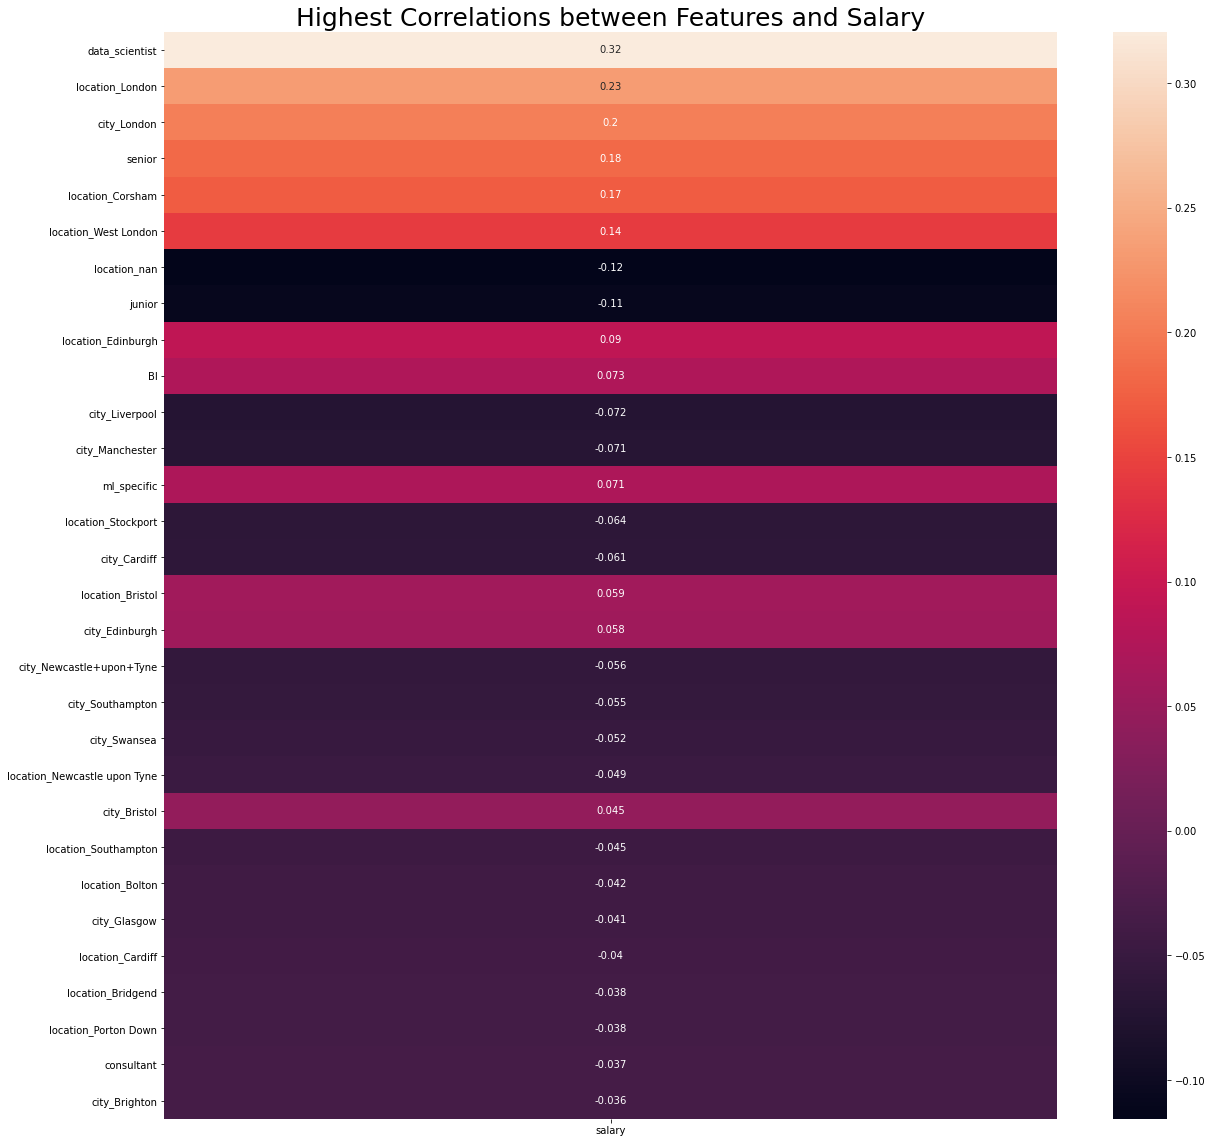

In [50]:

fig ,ax = plt.subplots(figsize = (20,20))
sns.heatmap(sorted_corr , annot = True, ax = ax);
ax.set_title('Highest Correlations between Features and Salary', fontsize = 25);

<h1> Modelling </h1>

### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median).

We could also perform Linear Regression (or any regression) to predict the salary value here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW salary.

While performing regression may be better, performing classification may help remove some of the noise of the extreme salaries. We don't have to choose the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of salaries.

In [48]:
## YOUR CODE HERE

y_data = data['high_low_salary']
y_data

x_data = data[[x for x in data.columns if 'location' in x]]
x_data

,location_Airdrie,location_Alderley Park,location_Altrincham,location_Andover,location_Arundel,location_Avonmouth,location_Babraham,location_Bath,location_Bedford,location_Birkenhead,...,location_Winsford,location_Wirral,location_Woking,location_Wolverhampton,location_Worcester,location_Worthing,location_Wrexham,location_Wrington,location_Wythenshawe,location_nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Thought experiment: What is the baseline accuracy for this model?

In [49]:
## YOUR CODE HERE
data['high_low_salary'].value_counts(normalize = True).max()

0.7582340574632095

In [50]:
#TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 1, stratify=y_data )

In [51]:
#standardise

from sklearn.preprocessing import StandardScaler

SCALE = StandardScaler()

x_train_std = SCALE.fit_transform(x_train)
x_test_std = SCALE.transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
tree = DecisionTreeClassifier()

tree_params = {'ccp_alpha': np.logspace(-5,5,10),
 
 'criterion': ['gini','entropy'],
 'max_depth': [x for x in range(3,10)],
 
 'max_features': np.linspace(0.1,1,10),
 'splitter': ['best', 'random']}

tree_grid = GridSearchCV(tree, tree_params, 
                         cv = 5,
                         n_jobs = 2,
                         error_score = 0.0,
                         verbose = 1)




In [53]:
from sklearn.ensemble import BaggingClassifier , RandomForestClassifier

bag = BaggingClassifier(DecisionTreeClassifier())

bag.get_params()

{'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [54]:
params = {'base_estimator__ccp_alpha': np.logspace(-5,5,5),
 'base_estimator__criterion': ['gini','entropy'],
 'base_estimator__max_depth': [x for x in range(3,15)],

 'max_features': [0.3,0.5,0.7,1.0],
 'max_samples': [0.3,0.5,0.7,1.0],
 'n_estimators': [x for x in range(10,100,20)],
 'oob_score': [True],
}



bag_grid = GridSearchCV(bag, params,
                       n_jobs = 2,
                       verbose = 1,
                       error_score = 0.0,
                       cv = 5)

In [55]:
forest = RandomForestClassifier()

forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
params = {'ccp_alpha': np.logspace(-5,5,5),
 
 'criterion': ['gini','entropy'],
 'max_depth': [x for x in range(3,8)],

 'max_features': [0.1,0.5,0.9,1.0],
 'max_samples': [0.1,0.5,0.9,1.0],
 'n_estimators': [x for x in range(10,100,20)],
 'oob_score': [True],
}



forest_grid = GridSearchCV(forest, params,
                       n_jobs = 2,
                       verbose = 1,
                       error_score = 0.0,
                       cv = 5)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

vote = VotingClassifier(estimators = [('lrg', LogisticRegression()),('knn', KNeighborsClassifier()), ('dtr', DecisionTreeClassifier())])

vote.get_params()

{'estimators': [('lrg', LogisticRegression()),
  ('knn', KNeighborsClassifier()),
  ('dtr', DecisionTreeClassifier())],
 'flatten_transform': True,
 'n_jobs': None,
 'verbose': False,
 'voting': 'hard',
 'weights': None,
 'lrg': LogisticRegression(),
 'knn': KNeighborsClassifier(),
 'dtr': DecisionTreeClassifier(),
 'lrg__C': 1.0,
 'lrg__class_weight': None,
 'lrg__dual': False,
 'lrg__fit_intercept': True,
 'lrg__intercept_scaling': 1,
 'lrg__l1_ratio': None,
 'lrg__max_iter': 100,
 'lrg__multi_class': 'auto',
 'lrg__n_jobs': None,
 'lrg__penalty': 'l2',
 'lrg__random_state': None,
 'lrg__solver': 'lbfgs',
 'lrg__tol': 0.0001,
 'lrg__verbose': 0,
 'lrg__warm_start': False,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform',
 'dtr__ccp_alpha': 0.0,
 'dtr__class_weight': None,
 'dtr__criterion': 'gini',
 'dtr__max_depth': None,
 'dtr__max_featur

In [58]:
vote_params = {'knn__metric': ['manhatten', 'euclidean'],
              'dtr__criterion': ['gini'],
 'dtr__max_depth':[x for x in range(2,12)],
              'knn__n_neighbors': [x for x in range(3,15)],
              'voting': ['hard','soft'],
              'lrg__C': np.logspace(-5,5,5),
              'lrg__penalty': ['l2', 'l1']}

vote_grid = GridSearchCV(vote,vote_params,
                        n_jobs = 2,
                       verbose = 1,
                       error_score = 0.0,
                       cv = 5)

In [59]:
## YOUR CODE HERE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
lr_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear', 'saga', 'sag', 'lbfgs', 'newton-cg'],
    'C': np.logspace(-5,5,20)
}

lr_grid = GridSearchCV(LogisticRegression(),
                       lr_params, 
                       error_score = 0.0,
                      n_jobs = 2,
                      cv = 5,
                      verbose = 1)



In [60]:
elastic_params = {
    'penalty':['elasticnet'],
    'solver':['liblinear', 'saga', 'sag', 'lbfgs', 'newton-cg'],
    'C': np.logspace(-5,5,20),
    'l1_ratio':np.linspace(0,1,20)
}

elastic_grid = GridSearchCV(LogisticRegression(),
                       elastic_params, 
                       error_score = 0.0,
                       n_jobs = 2,
                       cv = 5,
                       verbose = 1)
elastic_grid.fit(x_train_std,y_train)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


GridSearchCV(cv=5, error_score=0.0, estimator=LogisticRegression(), n_jobs=2,
             param_grid={'C': array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+0...3, 2.97635144e+04, 1.00000000e+05]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['elasticnet'],
                         'solver': ['liblinear', 'saga', 'sag', 'lbfgs',
                                    'newton-cg']},
             verbose=1)

In [61]:
#K NEIGHBORS CLASSIFIER

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

params = {'weights': ['uniform', 'distance'],
         'metric': ['manhattan', 'euclidean'],
         'n_neighbors': [x for x in range(2,20)]}

neigh_grid = GridSearchCV(model, params, 
                         n_jobs = 2,
                         error_score = 0.0,
                         verbose = 1,
                         cv = 5)


In [62]:
neigh_grid.get_params()

{'cv': 5,
 'error_score': 0.0,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsClassifier(),
 'n_jobs': 2,
 'param_grid': {'weights': ['uniform', 'distance'],
  'metric': ['manhattan', 'euclidean'],
  'n_neighbors': [2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 1}

In [63]:
from sklearn.svm import SVC

support = SVC(kernel = 'rbf')

support.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [67]:
support.fit(x_train_std,y_train)

SVC()

In [68]:
from sklearn.model_selection import cross_val_score
from tqdm import tqdm

In [69]:
model_results = []
for x in [lr_grid.fit(x_train_std , y_train), 
               elastic_grid.fit(x_train_std,y_train), neigh_grid.fit(x_train_std,y_train), 
               vote_grid.fit(x_train_std,y_train)]:
    model_results.append([x.best_score_ , x.best_params_, x.score(x_test_std, y_test)])

model_results.append([np.mean(cross_val_score(support, x_train_std,y_train,cv =5)) ,
                      'kernel = rbf',support.score(x_test_std,y_test)])

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 2000 candidates, totalling 10000 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 4800 candidates, totalling 24000 fits


/Users/chrismembrey/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [71]:
for x in [tree_grid.fit(x_train,y_train), bag_grid.fit(x_train,y_train), 
               forest_grid.fit(x_train,y_train)]:
    model_results.append([x.best_score_ , x.best_params_, x.score(x_test, y_test)])


Fitting 5 folds for each of 80000 candidates, totalling 400000 fits
Fitting 5 folds for each of 9600 candidates, totalling 48000 fits
Fitting 5 folds for each of 28800 candidates, totalling 144000 fits


In [72]:
locations_only_no_smote = pd.DataFrame(model_results , index = ['lasso/ridge', 'elastic', 'k nearest',  'vote classification','support vector machine','decision tree', 'bagging decision tree', 'random forest'], columns = ['best score', 'best parameters', 'test score'])
locations_only_no_smote

,best score,best parameters,test score
lasso/ridge,0.758109,"{'C': 1e-05, 'penalty': 'l1', 'solver': 'libli...",0.758741
elastic,0.758109,"{'C': 1e-05, 'l1_ratio': 0.0, 'penalty': 'elas...",0.758741
k nearest,0.744074,"{'metric': 'euclidean', 'n_neighbors': 12, 'we...",0.748252
vote classification,0.757232,"{'dtr__criterion': 'gini', 'dtr__max_depth': 2...",0.758741
support vector machine,0.751099,kernel = rbf,0.758741
decision tree,0.758986,"{'ccp_alpha': 1e-05, 'criterion': 'gini', 'max...",0.758741
bagging decision tree,0.759864,{'base_estimator__ccp_alpha': 0.00316227766016...,0.758741
random forest,0.760733,"{'ccp_alpha': 0.0001291549665014884, 'criterio...",0.758741


In [73]:
locations_only_no_smote.to_csv('results_table_locations_only_no_smote.csv', index = False)

In [74]:
#now locations only with smoteN - smote N stands for Synthetic Minority Over-sampling Technique for Nominal data (categorical name labels).



In [75]:
from imblearn.over_sampling import SMOTEN
sm = SMOTEN(random_state=27)
x_data, y_data = sm.fit_resample(x_data, y_data)

In [76]:
x_data

,location_Airdrie,location_Alderley Park,location_Altrincham,location_Andover,location_Arundel,location_Avonmouth,location_Babraham,location_Bath,location_Bedford,location_Birkenhead,...,location_Winsford,location_Wirral,location_Woking,location_Wolverhampton,location_Worcester,location_Worthing,location_Wrexham,location_Wrington,location_Wythenshawe,location_nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2160,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2161,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2162,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
y_data.value_counts(normalize = True)

1    0.5
0    0.5
Name: high_low_salary, dtype: float64

In [78]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 1, stratify=y_data )

In [79]:
from sklearn.preprocessing import StandardScaler

SCALE = StandardScaler()

x_train_std = SCALE.fit_transform(x_train)
x_test_std = SCALE.transform(x_test)

In [ ]:
tree = DecisionTreeClassifier()

tree_params = {'ccp_alpha': np.logspace(-5,5,10),
 
 'criterion': ['gini','entropy'],
 'max_depth': [x for x in range(2,8)],
 'splitter': ['best', 'random']}

tree_grid = GridSearchCV(tree, tree_params, 
                         cv = 5,
                         n_jobs = 2,
                         error_score = 0.0,
                         verbose = 1)

tree_grid.fit(x_train,y_train)


In [81]:
from sklearn.model_selection import GridSearchCV

In [84]:
model_results = []
for x in [lr_grid.fit(x_train_std , y_train), 
               elastic_grid.fit(x_train_std,y_train), neigh_grid.fit(x_train_std,y_train), 
               vote_grid.fit(x_train_std,y_train)]:
    model_results.append([x.best_score_ , x.best_params_, x.score(x_test_std, y_test)])

model_results.append([np.mean(cross_val_score(support, x_train_std,y_train,cv =5)) ,
                      'kernel = rbf',support.score(x_test_std,y_test)])

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/Users/chrismembrey/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Fitting 5 folds for each of 2000 candidates, totalling 10000 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 4800 candidates, totalling 24000 fits


/Users/chrismembrey/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [2]:
for x in tqdm([tree_grid.fit(x_train,y_train), bag_grid.fit(x_train,y_train), 
               forest_grid.fit(x_train,y_train)]):
    model_results.append([x.best_score_ , x.best_params_, x.score(x_test, y_test)])


In [90]:
locations_only_smote = pd.DataFrame(model_results , index = ['lasso/ridge', 'elastic', 'k nearest',  'vote classification','support vector machine'], columns = ['best score', 'best parameters', 'test score'])
locations_only_smote

# 'decision tree', 'bagging decision tree', 'random forest'

,best score,best parameters,test score
lasso/ridge,0.647024,"{'C': 3.359818286283781e-05, 'penalty': 'l2', ...",0.644342
elastic,0.657407,"{'C': 0.01438449888287663, 'l1_ratio': 0.15789...",0.637413
k nearest,0.640098,"{'metric': 'manhattan', 'n_neighbors': 13, 'we...",0.602771
vote classification,0.647019,"{'dtr__criterion': 'gini', 'dtr__max_depth': 1...",0.637413
support vector machine,0.689770,kernel = rbf,0.501155


In [ ]:
locations_only_smote.to_csv('results_locations_smote.csv')

This model is 66 percent accurate with just location alone

<h2> NOW WHAT ABOUT WHEN WE INCORPERATE THE OTHER FEATURES AS WELL AS LOCATION </h2>


In [102]:
#NO SMOTE
x_data = data[[x for x in data.columns if x not in ['title', 'salary', 'company', 'summary', 'high_low_salary']]]
x_data

y_data = data['high_low_salary']
y_data

0       1
1       1
2       1
3       1
4       1
       ..
1422    0
1423    0
1424    0
1425    0
1426    0
Name: high_low_salary, Length: 1427, dtype: int64

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 1, stratify=y_data )

In [104]:
SCALE = StandardScaler()

x_train_std = SCALE.fit_transform(x_train)
x_test_std = SCALE.transform(x_test)

In [105]:
tree = DecisionTreeClassifier()

tree_params = {'ccp_alpha': np.logspace(-5,5,10),
 
 'criterion': ['gini','entropy'],
 'max_depth': [x for x in range(3,10)]}

tree_grid = GridSearchCV(tree, tree_params, 
                         cv = 5,
                         n_jobs = 2,
                         error_score = 0.0,
                         verbose = 1)


tree_grid.fit(x_train,y_train)

Fitting 5 folds for each of 140 candidates, totalling 700 fits


GridSearchCV(cv=5, error_score=0.0, estimator=DecisionTreeClassifier(),
             n_jobs=2,
             param_grid={'ccp_alpha': array([1.00000000e-05, 1.29154967e-04, 1.66810054e-03, 2.15443469e-02,
       2.78255940e-01, 3.59381366e+00, 4.64158883e+01, 5.99484250e+02,
       7.74263683e+03, 1.00000000e+05]),
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9]},
             verbose=1)

In [109]:
#Ada boosting
from sklearn.ensemble import AdaBoostClassifier

base_estimator = tree_grid.best_estimator_

ada_boost = AdaBoostClassifier(base_estimator = base_estimator)
ada_params = {'n_estimators':[x for x in range(5,120,30)]}

ada_grid = GridSearchCV(ada_boost, ada_params,
                       n_jobs = 2,
                         error_score = 0.0,
                         verbose = 1,
                         cv = 5)

In [110]:
from sklearn.ensemble import GradientBoostingClassifier

base_estimator = tree_grid.best_estimator_

grad_boost = GradientBoostingClassifier(criterion = 'mse')

grad_params = {'learning_rate' : [0.1,1.0],'n_estimators' : [x for x in range(5,120,30)],
               'validation_fraction': [0.5,0.7,0.9],
               'n_iter_no_change' : [x for x in range(5,20,5)]
                                    }

grad_grid = GridSearchCV(grad_boost, grad_params,
                       n_jobs = 2,
                         error_score = 0.0,
                         verbose = 1,
                         cv = 5)

In [111]:
#use scaled data for svm because scaling can influence the reation of the hyperplane (separation plane)

In [112]:
support.fit(x_train_std,y_train)

SVC()

In [113]:
model_results = []
for x in [lr_grid.fit(x_train_std , y_train), 
               elastic_grid.fit(x_train_std,y_train), neigh_grid.fit(x_train_std,y_train), 
               vote_grid.fit(x_train_std,y_train)]:
    model_results.append([x.best_score_ , x.best_params_, x.score(x_test_std, y_test)])

model_results.append([np.mean(cross_val_score(support, x_train_std,y_train,cv =5)) ,
                      'kernel = rbf',support.score(x_test_std,y_test)])




Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 2000 candidates, totalling 10000 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits


/Users/chrismembrey/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Fitting 5 folds for each of 4800 candidates, totalling 24000 fits


/Users/chrismembrey/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [1]:
for model in [tree_grid.fit(x_train,y_train), bag_grid.fit(x_train,y_train),forest_grid.fit(x_train,y_train), ada_grid.fit(x_train,y_train), grad_grid.fit(x_train,y_train)]:
    model_results.append([model.best_score_ , model.best_params_, x.score(x_test, y_test)])


In [116]:
no_smote = pd.DataFrame(model_results , index = ['lasso/ridge', 'elastic', 'k nearest', 'vote classification','support vector machine'], columns = ['best score', 'best parameters', 'test score'])
no_smote

,best score,best parameters,test score
lasso/ridge,0.804555,"{'C': 0.04832930238571752, 'penalty': 'l1', 's...",0.811189
elastic,0.808940,"{'C': 0.01438449888287663, 'l1_ratio': 0.21052...",0.804196
k nearest,0.806294,"{'metric': 'euclidean', 'n_neighbors': 10, 'we...",0.758741
vote classification,0.815943,"{'dtr__criterion': 'gini', 'dtr__max_depth': 7...",0.776224
support vector machine,0.796683,kernel = rbf,0.786713


In [117]:
no_smote.to_csv('all_variables_no_smote.csv')

<b> with SMOTEN for catagorical features only </b>

In [118]:

from imblearn.over_sampling import SMOTEN
sm = SMOTEN(random_state=27)
x_data, y_data = sm.fit_resample(x_data, y_data)

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 1, stratify=y_data )

In [120]:
SCALE = StandardScaler()

x_train_std = SCALE.fit_transform(x_train)
x_test_std = SCALE.transform(x_test)

In [121]:
tree = DecisionTreeClassifier()

tree_params = {'ccp_alpha': np.logspace(-5,5,10),
 'criterion': ['gini','entropy'],
 'max_depth': [x for x in range(3,10)],
 'splitter': ['best', 'random']}

tree_grid = GridSearchCV(tree, tree_params, 
                         cv = 5,
                         n_jobs = 2,
                         error_score = 0.0,
                         verbose = 1)


tree_grid.fit(x_train,y_train)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits


GridSearchCV(cv=5, error_score=0.0, estimator=DecisionTreeClassifier(),
             n_jobs=2,
             param_grid={'ccp_alpha': array([1.00000000e-05, 1.29154967e-04, 1.66810054e-03, 2.15443469e-02,
       2.78255940e-01, 3.59381366e+00, 4.64158883e+01, 5.99484250e+02,
       7.74263683e+03, 1.00000000e+05]),
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             verbose=1)

In [126]:
support.fit(x_train_std,y_train)

SVC()

In [156]:
model_results = []
for x in [lr_grid.fit(x_train_std , y_train), 
               elastic_grid.fit(x_train_std,y_train), neigh_grid.fit(x_train_std,y_train), 
               vote_grid.fit(x_train_std,y_train)]:
    model_results.append([x.best_score_ , x.best_params_, x.score(x_test_std, y_test)])

model_results.append([np.mean(cross_val_score(support, x_train_std,y_train,cv =5)) ,
                      'kernel = rbf',support.score(x_test_std,y_test)])

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/Users/chrismembrey/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Fitting 5 folds for each of 2000 candidates, totalling 10000 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits


/Users/chrismembrey/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Fitting 5 folds for each of 4800 candidates, totalling 24000 fits


/Users/chrismembrey/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/chrismembrey/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [168]:
for model in [tree_grid.fit(x_train,y_train),bag_grid.fit(x_train,y_train),forest_grid.fit(x_train,y_train), ada_grid.fit(x_train,y_train), grad_grid.fit(x_train,y_train)]:
    model_results.append([model.best_score_ , model.best_params_, x.score(x_test, y_test)])

#bag_grid.fit(x_train,y_train),forest_grid.fit(x_train,y_train), ada_grid.fit(x_train,y_train), grad_grid.fit(x_train,y_train)

In [132]:
smote = pd.DataFrame(model_results , index = ['lasso/ridge', 'elastic', 'k nearest', 'vote classification','support vector machine','decsion tree'], columns = ['best score', 'best parameters', 'test score'])
smote

# , 'bagging classifier', 'random forest','Ada boosting', 'Gradient Boosting'

,best score,best parameters,test score
lasso/ridge,0.756226,"{'C': 0.01438449888287663, 'penalty': 'l2', 's...",0.773672
elastic,0.756226,"{'C': 0.01438449888287663, 'l1_ratio': 0.0, 'p...",0.775982
k nearest,0.762581,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei...",0.759815
vote classification,0.781055,"{'dtr__criterion': 'gini', 'dtr__max_depth': 6...",0.773672
support vector machine,0.771222,kernel = rbf,0.764434
decsion tree,0.753897,"{'ccp_alpha': 1e-05, 'criterion': 'gini', 'max...",0.669746


In [133]:
smote.to_csv('all_variables_with_smote.csv')

In [238]:
#lets see what score linear kernel SVC produces and what the feature importances are.

linear_support = SVC(kernel = 'linear')

linear_support.fit(x_train_std,y_train)

scores = cross_val_score(linear_support, x_train_std,y_train,cv = 5)

print(np.mean(scores))
print(np.var(scores))

0.7105712048774799
0.00044602511609388793


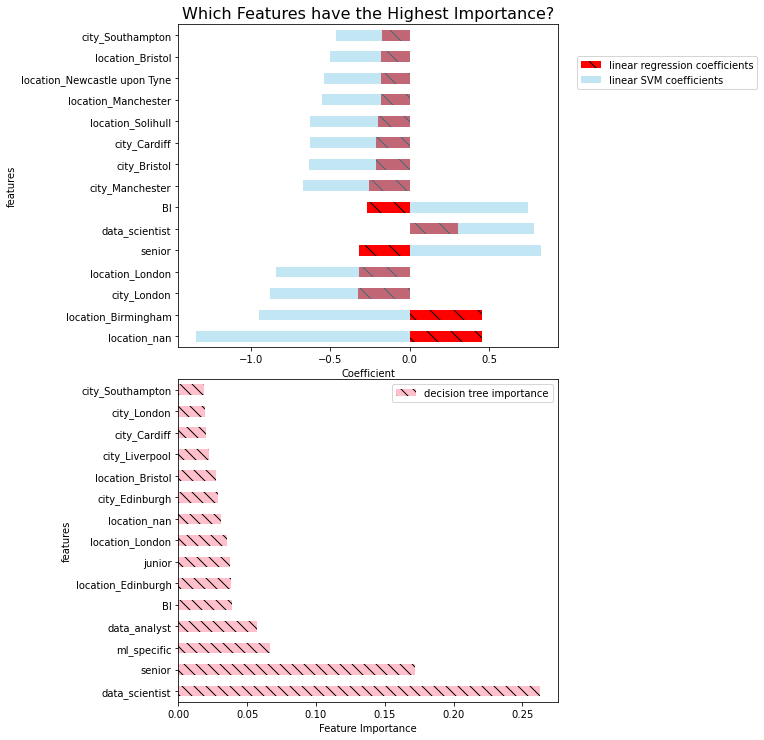

In [241]:
fig, ax = plt.subplots(ncols = 1,nrows = 2 ,figsize = (6,10));
fig.tight_layout()
pd.DataFrame({'coefs':lr_grid.best_estimator_.coef_[0], 'features': x_data.columns , 
              'absoloute_values': abs(lr_grid.best_estimator_.coef_[0])}).sort_values(by = 'absoloute_values', 
                                                                                        ascending = False).head(15).plot(kind = 'barh', x = 'features', y = 'coefs', hatch = '\\', color = 'red', 
                                                                                                                         label = 'linear regression coefficients', ax = ax[0])
pd.DataFrame({'coefs':linear_support.coef_[0], 'features': x_data.columns , 
              'absoloute_values': abs(linear_support.coef_[0])}).sort_values(by = 'absoloute_values', 
                                                                                        ascending = False).head(15).plot(kind = 'barh', x = 'features', y = 'coefs', color = 'skyblue', 
                                                                                                                         label = 'linear SVM coefficients', ax = ax[0], alpha = 0.5);
ax[0].set_xlabel('Coefficient')
ax[1].set_xlabel('Feature Importance')


pd.DataFrame({'coefs':tree_grid.best_estimator_.feature_importances_, 'features': x_data.columns , 
              'absoloute_values': abs(tree_grid.best_estimator_.feature_importances_)}).sort_values(by = 'absoloute_values', 
                                                                                        ascending = False).head(15).plot(kind = 'barh', x = 'features', y = 'coefs', hatch = '\\\\', color = 'pink', 
                                                                                                                        label = 'decision tree importance', ax = ax[1]);

ax[0].legend(loc = [1.05,.8]);

ax[0].set_title('Which Features have the Highest Importance?', fontsize = 16);

The models with greatest generalisation are the k nearest neighbors (weighted on distance which is calculated via a euclidean approach and 5 neighbors) and a support vector machine (radial basis function kernelling). 

The vote classification model is 28% higher than the baseline, an strong indication that our model works better than if we were to predict the high or low class by chance. Interestingly, the logistic regression model was optimised with an extremely high alpha, indicating that no regularisation incresed cross validated test scores. 

what we can see from the feature importances and coefficients (from models that can provide these metrics) is that titles containing 'data scientist' and positions that are senior have the greatest influence of high salary. A notable common feature was also having a machine learning specific title, demonstrating the industries necessity for highly skilled machine learning practitioners. It is no surprise that junior roles have a negative coefficient for the logistic regression since thier salaries a typically lower.
What is very surprising is the negative effect all locations appear to have on price. Initially this was thought to be due to multicolinearity between the city and the location. A ridge penalty is being utilised here, which doesnt eliminate multicolinearity as effectively as lasso, since lasso coefficients are driven to zero when multicolinearity is present.

<i> what the feature importance tells us?</i>:
The greater the feature importance, the higher the tree purity while splitting with that feature. Feature importance is the information gain while splitting on that feature, divided by the total information gain from all features.


<i> what does the coefficient tell us for logistic regression?</i>:
Here the coefficient for a data scientist says that being a data scientist will increase our log odds of having a high salary by 0.45. The odds are then increased for class 1 by 56%. Using this knowledge and assuming no other variables involvement and no intercept, the probability of having a salary above the 75% quartile is increased by 0.35. 

(Probability = $\frac{exp(log(odds))}{1+exp(log(odds))}$ )

# Best Model Evaluation:


firstly a classification report and confusion matrix for the <b> vote classification </b>. 

In [162]:
from sklearn.metrics import classification_report

print(classification_report(y_train, vote_grid.best_estimator_.predict(x_train_std)))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       866
           1       0.86      0.77      0.81       865

    accuracy                           0.82      1731
   macro avg       0.82      0.82      0.82      1731
weighted avg       0.82      0.82      0.82      1731



/Users/chrismembrey/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


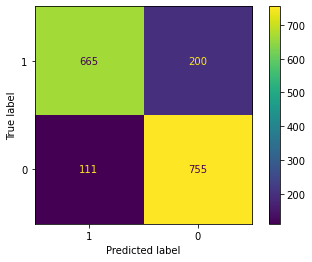

In [191]:
model = vote_grid.best_estimator_
model.fit(x_train_std,y_train)
from sklearn.metrics import plot_confusion_matrix , plot_roc_curve , plot_precision_recall_curve
plot_confusion_matrix(model , x_train_std, y_train, labels = [1,0]);

you cannot do the evaluation methods with a hard voting classifier becuase we need probabilities of class predictions.
lets see the voting classifier with soft voting.


/Users/chrismembrey/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


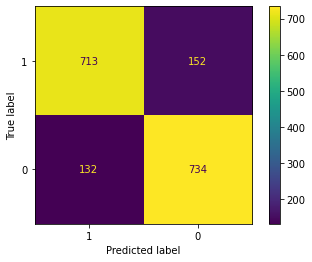

In [243]:

model = VotingClassifier(estimators=[('lrg', LogisticRegression(C=316.22776601683796)),
                             ('knn',
                              KNeighborsClassifier(metric='euclidean',
                                                   n_neighbors=4)),
                             ('dtr', DecisionTreeClassifier(max_depth=6))], voting = 'soft')

model.fit(x_train_std,y_train)
from sklearn.metrics import plot_confusion_matrix , plot_roc_curve , plot_precision_recall_curve
plot_confusion_matrix(model , x_train_std, y_train, labels = [1,0]);

In [248]:
print(classification_report(y_train,model.predict(x_train_std)))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       866
           1       0.84      0.82      0.83       865

    accuracy                           0.84      1731
   macro avg       0.84      0.84      0.84      1731
weighted avg       0.84      0.84      0.84      1731



What we can see is that the soft voting gives us very different results, which are more accurate than the hard voting for both class 0 and class 1!

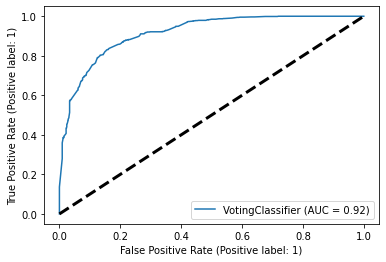

In [249]:
import matplotlib.pyplot as plt
plot_roc_curve(model, x_train_std, y_train)
plt.plot([0,1],[0,1], 'k--', linewidth = 3, label = 'Threshold line')

With an AUC score of 0.91, we can see that our voting classifier is an almost perfect model and is far more efficient at predicting higher salary than our baseline. We know if the model performs at baseline when the area under the curve is 0.5, where, no matter the threshold, the false positive rate and the true positive rate are equal.

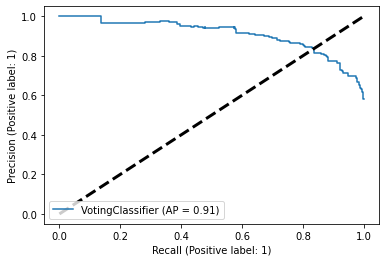

In [250]:
plot_precision_recall_curve(model,x_train_std,y_train)
plt.plot([0,1],[0,1], 'k--', linewidth = 3, label = 'Threshold line')

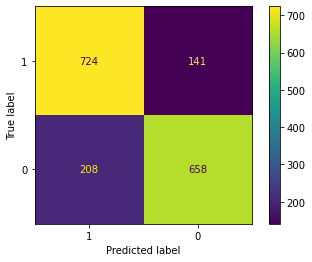

In [193]:
#support vector machine
model = support
model.fit(x_train_std,y_train)
from sklearn.metrics import plot_confusion_matrix , plot_roc_curve , plot_precision_recall_curve
plot_confusion_matrix(model , x_train_std, y_train, labels = [1,0])

here we can see that 665 of the observations were correctly predicted as high (true positive), 755 were correctly predicted as low (true negative), 200 were incorrectly predicted as low (false negative) and 111 were incorrectly predicted as high (false positive).

In [194]:
print(classification_report(y_train,support.predict(x_train_std)))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       866
           1       0.78      0.84      0.81       865

    accuracy                           0.80      1731
   macro avg       0.80      0.80      0.80      1731
weighted avg       0.80      0.80      0.80      1731



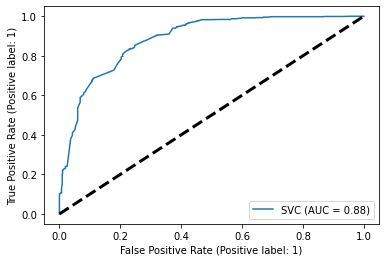

In [195]:
import matplotlib.pyplot as plt
plot_roc_curve(model, x_train_std, y_train)
plt.plot([0,1],[0,1], 'k--', linewidth = 3, label = 'Threshold line')

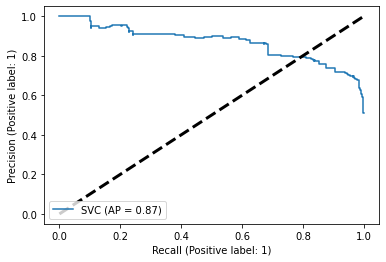

In [149]:
plot_precision_recall_curve(model,x_train_std,y_train)
plt.plot([0,1],[0,1], 'k--', linewidth = 3, label = 'Threshold line')

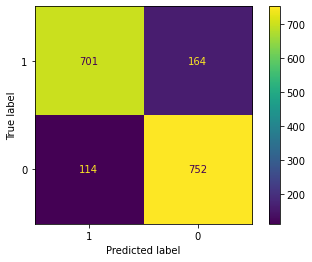

In [198]:
#k nearest neighbors
model = neigh_grid.best_estimator_
model.fit(x_train_std,y_train)
from sklearn.metrics import plot_confusion_matrix , plot_roc_curve , plot_precision_recall_curve
plot_confusion_matrix(model , x_train_std, y_train, labels = [1,0]);

In [199]:
print(classification_report(y_train,model.predict(x_train_std)))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       866
           1       0.86      0.81      0.83       865

    accuracy                           0.84      1731
   macro avg       0.84      0.84      0.84      1731
weighted avg       0.84      0.84      0.84      1731



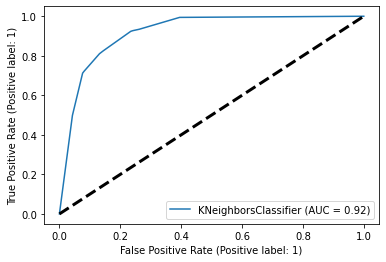

In [200]:
import matplotlib.pyplot as plt
plot_roc_curve(model, x_train_std, y_train)
plt.plot([0,1],[0,1], 'k--', linewidth = 3, label = 'Threshold line')

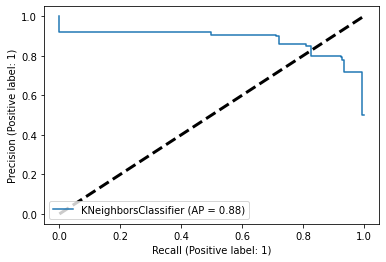

In [201]:
plot_precision_recall_curve(model,x_train_std,y_train)
plt.plot([0,1],[0,1], 'k--', linewidth = 3, label = 'Threshold line')

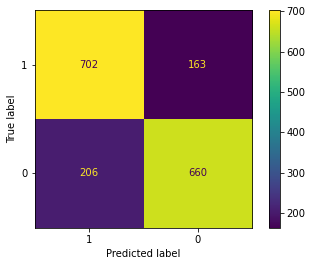

In [202]:
#logistic regression
model = lr_grid.best_estimator_
model.fit(x_train_std,y_train)
from sklearn.metrics import plot_confusion_matrix , plot_roc_curve , plot_precision_recall_curve
plot_confusion_matrix(model , x_train_std, y_train, labels = [1,0])

In [203]:
print(classification_report(y_train,model.predict(x_train_std)))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       866
           1       0.77      0.81      0.79       865

    accuracy                           0.79      1731
   macro avg       0.79      0.79      0.79      1731
weighted avg       0.79      0.79      0.79      1731



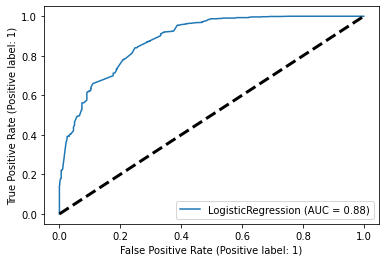

In [204]:
plot_roc_curve(model, x_train_std, y_train)
plt.plot([0,1],[0,1], 'k--', linewidth = 3, label = 'Threshold line');

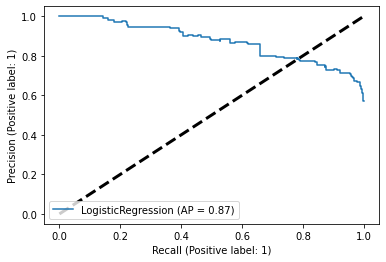

In [205]:
plot_precision_recall_curve(model,x_train_std,y_train)
plt.plot([0,1],[0,1], 'k--', linewidth = 3, label = 'Threshold line');

<b> 'Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job.'</b> - predicting lower salary when it is infact high indicates the boss would prefer a model with a lower false negative (recall) score, rather than a low false positive rate (precision).

From the precision-recall curve above we can see a good trade off between high recall and low precision would be at a threshold around 0.70, this threshold is used to decide whether a salary is high or low based on the models probability for each point being class one, which can be seen with the model.predict_proba function. A probability higher than 0.9 will be labelled as 1 in our model. A higher threshold means that if the probability of the salary being class 1 is higher, it is more likely to actually be that class, thus reducing the number of false positives. 
If the threshold was lower, at say 0.4, then our model is more likely to predict class 1 as the outcome and we will have more false positives.


out of the three individual models (k nearest neighbors, logistic regression and support vector machine) we can see that the highest precision score for predicting class 1 is the k nearest neighbors (0.86% accuracy and 88% average precision, according to the roc_auc plot).



The final model, below, is  scores the model based on the precision (the reduced number of false positives) rather than the recall.

In [152]:
cv_scores = cross_val_score(model, x_train_std,y_train, cv=5, scoring='precision')
print(cv_scores)
print(np.mean(cv_scores))

[0.76756757 0.74876847 0.76315789 0.66814159 0.77514793]
0.7445566914250501


In [153]:
cv_scores = cross_val_score(neigh_grid.best_estimator_, x_train_std,y_train, cv=5, scoring='precision')
print(cv_scores)
print(np.mean(cv_scores))

[0.70769231 0.79166667 0.79661017 0.73684211 0.73255814]
0.7530738777297084


In [197]:
cv_scores = cross_val_score(vote_grid.best_estimator_, x_train_std,y_train, cv=5, scoring='precision')
print(cv_scores)
print(np.mean(cv_scores))

/Users/chrismembrey/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chrismembrey/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[0.75956284 0.79651163 0.80116959 0.77966102 0.77358491]
0.7820979965379673


/Users/chrismembrey/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Executive Summary of results,  written for a non-technical audience.


<b><u>Point of view</u> -"You're working as a data scientist for a contracting firm that's rapidly expanding, they need to leverage data to win more contracts. The firm offers technology and scientific solutions and wants to be competitive in the hiring market. 
    
Your manager wants you to determine the industry factors that are most important in predicting the salary amounts for these data." </b>




<b>ABSTRACT</b>

The search for a job is highly impacted by the salary that companies post while advertising them. In this study, I have created a hard-voting classification machine learning model that has used scraped data from indeed.com to predict whether a salary will be high or low for data related jobs, such as scientific researchers or data analysts. The model has an accuracy score of 78% when smote was incorperated into the data preprocessing stage, which shows that it is capable of ameliorating prediction of high salary compared to the baseline accuracy (50%). Furthermore, the precision recall curve for the k nearest neighbors (embedded within the vote classifier) has shown an average precision of 88%, indicating that the model will have use for the company whose priority is limiting the number of candidates who are told incorrectly that they will have a high salary, when it will be low in reality.

<b> METHOD </b>

Firstly, the data was scraped from indeed.com, a popular job postings website containing job cards from townships from across the UK. The job postings that were scraped only contained salaries, such that we could create observations into a structured pandas dataframe for a machie learning (ML) model. Furthermore, these postings have only come from the UK, since our company descretely hires for the UK market. Using the HTTPS uniform resource locator (URL) query string, a for loop was created which iterated through the cities and the start query (the index page of jobs for that particular city). A singular function was used, encompassing a beautifulsoup instance created from the URL, to pull the required information from each job card into a lists of lists that formed the numpy basis for the structured pandas dataframe. The variables extracted from each job card were salary, job title, job location, job summary (the brief summary that can be located on the simple job card) and the searched city in the URL query (the searched city was used becuase many postings didnt contain the location and regularisation in models could eliminate multicolinearity between location and city). A single function was adopted instead of four singlular functions becuase the four functions ran at different speeds, since they were different lengths, manipulating the order of extraction for the variables. The Four functions were merged into one so that they could all run in unison. 

After the dataset was obtained, the salary column required removal of pound symbols and averaging of the salary ranges placed in the postings. According to prospects.com, data scientists are typically working 45 hours per week, thus the hourly rates were multiplied by 45. Locations were stripped of the postcodes, since the unique postacode holds no predictive value to the dataset (much like a persons name wouldn't be expected to effect their salary).The final cleaning undertaken was to remove whitespace from the columns, to enhance the dataframe readability. 

Feature engineering was necessary to gain potentially predictive features from the (CORRELATION BETWEEN FEATURES) job titles, such as when jobs have tags that may influence price. One such example is 'junior' or 'senior' in the posting.
Categorical varibles were then dummified and the first column was dropped to avoid double counting features. For example, if all location categories were zero, one can assume the category to be the dropped column. The salries were binarized, such that a high salary (above the 75% quartile) was 1 and salaries lower than this threshold were valued as 0.

During the preprocessing phase, data pipelines were split between the cleaned data and data that had been altered with a Synthetic Minority Over-sampling Technique (Nominal), which could be incorperated due to the high baseline accuracy of 75.8%. A train test split was then utilised with a test size set to 20% and stratification to ensure equal proportions of the classes to be classified, which will minimize variability in our models. The data were scaled using a standard scaler. This was primarily for the parametric models that directly compare features using coefficients (Logistic Regression in this case). For non parametric models, such as k nearest neighbors and decision trees, the unscaled data were used.

<p>During the modelling phase, the primary ML models used were classifiers such logistic regression, k nearest neighbors and decision trees. It's important to note, all models were cross validated on with a grid search that was incorperated to optimise hyperparameters for each model.</p>
Although its appearance is with the sigmoid function, the logistic regression is infact a linear model that predicts the log-odds of an event taking place, given the variables supplied to the model. The outputs rage from 0-1, giving the probability of being class 1 (high salary) or class 0. Since there are many variables, the logistic regression model required regularization which can be done with a ridge (least squares/sum of squares approach) or lasso (absoloute squares). Regulariation aims to reduce overfitting of models (increase bias) and reduce variability from low scoring test samples (used from the train test split). In doing so, the coefficient values are minimised and the model's prediction changes less than it would have without the regularization. The other models used at a basic level were K-Nearest Neighbors, a Decision Tree Classifier and a Support Vector Machine
<p>A K-Nearest Neighbors model was fitted to the data, aiming to classify the unseen data points based on the classification of thier nearest neighbors, which was calculated by either euclidean (pythagorus theorum) or manhattan distance in a space of dimesions matching the number of predictor variables.</p>
A Decision tree classifies our inputs from nodes that ask questions of the variables. The higher up the decision tree, the higher the dissorter of classes that the observations belong to (higher entropy), untill the tree has asked enough questions to totally classify inputs. An example of a question could be 'location_london == True?', splitting on data points that are wither 1 (yes) or 0 (no).
<p>Lastly, a Support Vector Machine was incorperated as it deals excellently with binary problems by forming a linear hyperplane between two classes. The kerneling (a transformation of the data to enhance its linear separability) was used with the Radial Basis Function, whih works similarly to a K-Nearest Neighbors, weighting the distance of nearby observations to predict a classification on test data. The closer one point is to another, Radial Basis Function will give those two points a weighting closer to 1. The further two points are in an infinitely large dimenion, the closer to 0 the weighting will be. </p>
The metric with which the models were ratified was the accuracy score for both the train and testing samples. Model generalisation was measured by closeness of test and training accuracy and models which had closer scores were weighted higher in the decision processes then models that had higher scores for training or testing. 
The discussion below will discuss the more complex models and evaluate the top three performing models in context to what to the company is aiming to achieve.

<b>DISCUSSION</b>

The models with greatest generalisation are the k nearest neighbors (weighted on distance which is calculated via a euclidean approach and 5 neighbors) and a support vector machine (radial basis function kernelling). 

The vote classification model is 28% higher than the baseline, an strong indication that our model works better than if we were to predict the high or low class by chance. The vote classification model, with hard voting, is a type of ensemble method that takes the predictions of the support vector machine, logistic regression and the k nearest neighbors and chooses an overall prediction for each observation. For example, consider a single observation which had been predicted as class 0 for the logistic regression but class 1 for the other two. In this case the overall model would predict the observation to be class 1 becuase that is the majority vote. 
Interestingly, the logistic regression model was optimised with an extremely high alpha, indicating that no regularisation increased cross validated test scores. 

what we can see from the feature importances and coefficients (from models that can provide these metrics) is that titles containing 'data scientist' and positions that are senior have the greatest influence of high salary. A notable common feature was also having a ML specific title, demonstrating the industries necessity for highly skilled machine learning practitioners. It is no surprise that junior roles have a negative coefficient for the logistic regression since thier salaries are typically lower.
What is very surprising is the negative effect all locations appear to have on price. Initially this was thought to be due to multicolinearity between the city and the location. A ridge penalty is being utilised here, which doesnt eliminate multicolinearity as effectively as lasso, since lasso coefficients are driven to zero when multicolinearity is present, increasing the datas' background noise.

From the precision-recall curves above, we can see a good trade off between low recall and high precision would be at a threshold around 0.70, this threshold is used to decide whether a salary is high or low based on the models' probability for each point being class one, which can be seen with the model.predict_proba function. A probability higher than 0.9 will be labelled as 1 in our model. A higher threshold means that if the probability of the salary being class 1 is higher, it is more likely to actually be that class, thus reducing the number of false positives. 
If the threshold was lower, at say 0.4, then our model is more likely to predict class 1 as the outcome and we will have more false positives.


Out of the three individual models (k nearest neighbors, logistic regression and support vector machine) we can see that the highest precision score for predicting class 1 is the k nearest neighbors (0.86% accuracy and 88% average precision, according to the roc_auc plot). The voting classifier set to soft voting resulted in an AUC score of 0.91. we can see that our voting classifier is an almost perfect model and is far more efficient at predicting higher salary than our baseline.

Finally, although the voting classification model successfully reduces the number of fasle positives, it can still be improved significantly. The next steps to improve out model of predicting salary would be to scrape from many more websites such as Glassdoor, Linkedin and Otta. Increasing our salary reach can enlarge our dataset considerably such that we are able represent the population more closely, it also eliminates any bias in our data that may eminate from using one website source. Moreover, much of the data from job postings is locked in the words used to describe them. In a future model I shall consider utilising natural language processing (NLP) to see which words are used more frequently to predict higher salary.


<b> CONCLUSION </b>

Through voting classification we were able to accurately and precicly predict high salary, avoiding false positives. This limits the number of times we may tell a client they have a high salary, when it will in fact be low. However, all the models still have much improvement before they can be taken to market. This may be achieved through NLP and increasing data source scraping, but will require further analysis. 

<!-- TALK ABOUT IMPROVEMENT WITH NLP/Using more websites
TALK ABUT FEATURE IMPORTANCES BETWEEN MODELS
DISCUSS ROC / PRECISION RECALL AND THRESHOLD
CLASSIFICATION REPORTS / CONFUSION MATRIX
 -->





<h1> Converting the executive summary into a blog post, in which I document my approach in a tutorial for other aspiring data scientists. </h1>

Today we are going to be looking at an example of webscraping and data munging. To help me do this we shall look at data related to job posts and thier salaries. 

One major factor that often sways aspiring data scientists and analysts into the data proffesion is the mouth watering salary. My aim is to find which data related jobs specifically create the highest wealth, looking at location (UK only) and job titles specifically. 

We're primarily going to need to get some data related to job postings. One very well known website I have chosen is indeed.com which is the number one job website in the world. One tough hurdle when scraping the data was to pull out jobs which had salaries as companys have swayed from giving out salary information straight off the bat. The scraping function I used needed to have a condition to accept jobs with salary only, to free up memory space in the dataframe and to save the time during the scraping procedure:


![](image_folder/extraction_function.png)


Here, I have used a beautiful soup instance to find the classes and tags that corrspond to the job salary, location, company, title and summary (in my next blog, we will incorperate NLP into the predictions to see if we can improve them!). Often location values are null and so I have added the city that was searched to the list of predictor variables.


Below, we can see exactly where we are extracting from in the webpage:


![](image_folder/jobcard.png)


The jobcard class in our beautiful soup instance find_all() function is exactly the same as the html class in the website, indicated by the cursor.


                




We then need to use this function to query the website and extract the data by looping through the cities and the website index (start query). This was done with the following script:


![](image_folder/scraping_loop.png)

The soup instance here allows us to see the captcha solve when we are iterating through the loop, giving us a sense of whether our scraper is working. Furthermore, by printing outputs as we go, we can see evidence that our scraper is doing its job. This is critical as not doing so can lead you to waste time waiting for a useless scrape to finish!


Its imperitive that we get rid of duplicates, which can come due to overlapping cities or becuase the website has reposted jobs on the pages with high start values. Here, the duplicates were removed, including those duplicates where the city is different:






![](image_folder/remove_duplicates.png)




We now need our data to be cleaned so that its more presentable, structured and most importantly, useful!
The main columns to change were salary and location. The salary was changed with a simple function that returned the average salary in the ranges provided by the website (rangeds are indicated with '-' which is why this character features prominently in the function):


![](image_folder/salary_converter.png)
 
 
with this function, we can use .apply on the salary column to alter the values.





Next, the locations need to have the postcodes remove, since they have no predictive power. This can be done using the regex library, which studies the characters in words and removes any words that contain numbers:

![](image_folder/change_location.png)

The words hidden within the job title can tell us a lot about the resposibility of the employee and therefore, thier salary. When you run you're own version of this study, you can choose whichever words you may deem as predictive. Here I have picked key words such as junior, senior and machine learning:

![](image_folder/title_features.png)


Here is a script that creates a new list and for each data point in the salary column, if the salary is above the 75% quartile, that observation has the label 1. If its lower, its given the label 0. This will be our target variable:

![](image_folder/binarize_salary.png)

After dummyfying the location and city columns, we should have a dataset that looks something similar to this:

![](image_folder/Dataset.png)

When preprocessing data, we must split into x (predictors) and y (target). Then the predictor variables need a stratified train-test-split (stratification to ensure equal proportions of classes within the training and test datasets).

Then we standardise the variables (specifically necessary is there are continuous variables in your dataset that have different scales!).


After this, we are ready to model. I have modelled my data with a k nearest neighbors, decision tree and logistic regression. Since this is a blog about scraping and cleaning, I will skip the explaination of these for now and discuss them in a future blog. What we will go through is the evaluation of a model. My example will be for the logistic regression.

The best methods for evaluation in a binary classification problem are the classification report , confusion matrix, ROC-AUC and precision-recall curve, below:


![](image_folder/lr_confusion_classification.png)


The logistic regression will predict the probability that a class belongs has the value 1 and prescribes an observation with that class if the probability is above the 0.5 threshold. The 0.5 threshold has resulted in 163 false negatives and 206 false positives, indicating that, at the 0.5 threshold, the recall is greater than the precision for this model, which is evidenced in the classification report. The report shows that for class 1, precision is 0.77 and recall is 0.81.

Suppose our aim was to avoid tellig someone who will get a low salary, that they will infact have a high salary. We would require fewer false positives. This can be done by increasing the thrshold. Which is what the precision recall curve tells us, below:


![](image_folder/precision_recall.png)


From the precision-recall curve above we can see a good trade off between high recall and low precision would be at a threshold around 0.70, this threshold is used to decide whether a salary is high or low based on the models probability for each point being class one, which can be seen with the model.predict_proba function. A probability higher than 0.9 will be labelled as 1 in our model. A higher threshold means that if the probability of the salary being class 1 is higher, it is more likely to actually be that class, thus reducing the number of false positives. 
If the threshold was lower, at say 0.4, then our model is more likely to predict class 1 as the outcome and we will have more false positives.


Finally, lets look at the ROC curve:

![](image_folder/roc.png)

The key metric here is the AUC which is a measure of how well our model classifies a high salary. AUC is prefered over accuracy score becuase the AUC can handle imbalanced datasets.

Our AUC here is 88% indicating that our model is a strong predictor of high slaries. However there is still room for improvement. 

Next time we shall dive into NLP and see if it can help increase our models' accuracy.

NB - Time permitting, I would have carried out more ensemble methods. On my laptop these were taking too long and I needed to write the report with the models that I could run quickly. 